In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_train = pd.read_csv("./KDDTrain.csv")
df_test = pd.read_csv("./KDDTest.csv")


In [3]:
le = LabelEncoder()
for i in df_train.columns:
    if df_train[i].dtypes.name == "object":
        df_train[i] = le.fit_transform(df_train[i])
        df_test[i] = le.fit_transform(df_test[i])

In [4]:
X_train, y_train = df_train.iloc[:, :-1].values, df_train.iloc[:, -1].values
X_test, y_test = df_test.iloc[:, :-1].values, df_test.iloc[:, -1].values

In [5]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_train, y_train)
tree_params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": np.arange(1, 31),
    "max_features": ["auto", "sqrt", "log2", None],
    "random_state": [0, 42, 101]
}

In [7]:
search_tree = RandomizedSearchCV(tree, tree_params, random_state=42)
search_tree.fit(X_train, y_train)

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'

RandomizedSearchCV(estimator=DecisionTreeClassifier(max_depth=5,
                                                    random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'random_state': [0, 42, 101],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [8]:
search_tree.best_score_

0.9982375933941133

In [10]:
tree = search_tree.best_estimator_.fit(X_train, y_train)


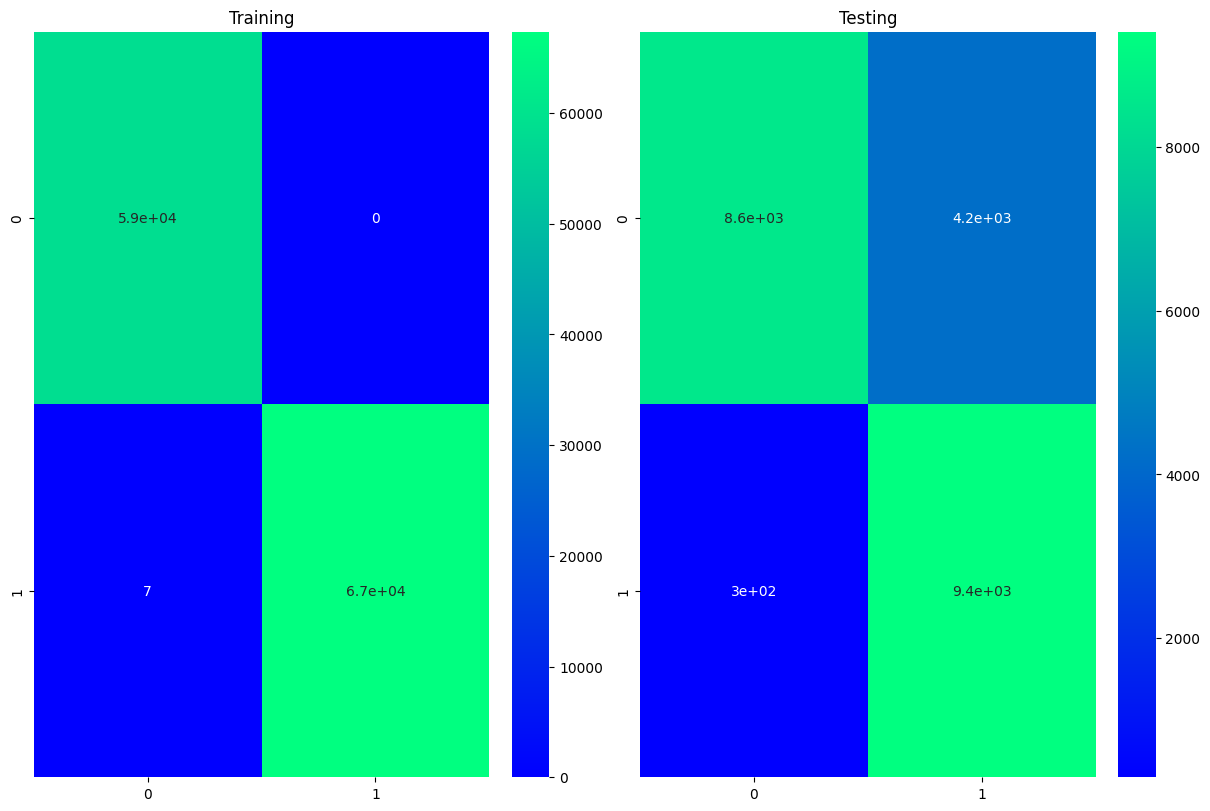

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), layout="constrained")

sns.heatmap(confusion_matrix(y_train, tree.predict(X_train)), annot=True, cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, tree.predict(X_test)), annot=True, cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")

plt.show()

In [12]:
print("Training\n", classification_report(y_train, tree.predict(X_train)))

Training
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     58621
           1       1.00      1.00      1.00     67343

    accuracy                           1.00    125964
   macro avg       1.00      1.00      1.00    125964
weighted avg       1.00      1.00      1.00    125964



In [13]:
print("Testing\n", classification_report(y_test, tree.predict(X_test)))

Testing
               precision    recall  f1-score   support

           0       0.97      0.67      0.79     12830
           1       0.69      0.97      0.81      9711

    accuracy                           0.80     22541
   macro avg       0.83      0.82      0.80     22541
weighted avg       0.85      0.80      0.80     22541



In [14]:
# save model
import pickle
filename = "model.sav"
pickle.dump(tree, open(filename, "wb"))

In [15]:
# load model
model = pickle.load(open(filename, "rb"))
print(model.score(X_test, y_test))

0.7986779645978439
